Quantum amplitude amplification and estimation
[arxiv](https://arxiv.org/abs/quant-ph/0005055)
のTheorem3の確認

説明
[Qiita](https://qiita.com/koke-saka/items/16b20edfeca49e1049cd)

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def one_step(M,a,theta):
    if np.random.rand()<a:
        return True,1
    j = np.random.randint(1,M+1) 
    prob = (np.sin((2*j+1)*theta))**2
    if np.random.rand()<prob:
        return True, 2+2*j
    return False,2+2*j

In [3]:
def trial(a,theta):
    c = 1.5
    total_num = 0
    for i in range(1000):
        M = math.ceil(c**i)
        f,num = one_step(M,a,theta)
        total_num += num
        if f:
            return total_num,True
    return total_num,False

In [8]:
a_list = [0.1**(i+1) for i in range(30)]
a_list = np.array(a_list)
query_classic = 1/a_list
query_quantum = np.empty(0)
for a in a_list:
    sum_query = 0
    theta = np.arcsin(np.sqrt(a))
    for i in range(1000):
        num,f = trial(a,theta)
        sum_query += num
        if f is False:
            print('Fail')
    ave = sum_query/1000
    print(f'a:{a} query:{ave}')
    query_quantum = np.append(query_quantum,ave)

a:0.1 query:5.413
a:0.010000000000000002 query:24.187
a:0.0010000000000000002 query:89.713
a:0.00010000000000000002 query:306.212
a:1.0000000000000003e-05 query:1034.892
a:1.0000000000000004e-06 query:2858.658
a:1.0000000000000004e-07 query:8607.834
a:1.0000000000000005e-08 query:30541.386
a:1.0000000000000005e-09 query:88135.102
a:1.0000000000000006e-10 query:270865.7
a:1.0000000000000006e-11 query:1063522.0
a:1.0000000000000006e-12 query:2900836.75
a:1.0000000000000007e-13 query:9489230.94
a:1.0000000000000008e-14 query:28441395.188
a:1.0000000000000009e-15 query:96687611.558
a:1.0000000000000008e-16 query:297801564.54
a:1.000000000000001e-17 query:909133809.306
a:1.000000000000001e-18 query:2929018286.87
a:1.000000000000001e-19 query:9190470981.674
a:1.0000000000000011e-20 query:28857005972.174
a:1.0000000000000012e-21 query:92389329854.128
a:1.0000000000000012e-22 query:267216730063.598
a:1.0000000000000013e-23 query:914262134996.78
a:1.0000000000000014e-24 query:2974120734077.8
a:

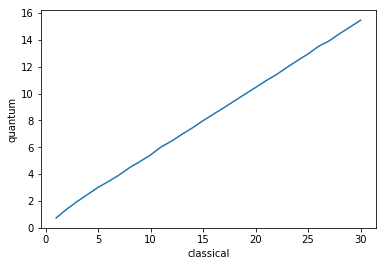

In [9]:
plt.plot(np.log10(query_classic),np.log10(query_quantum))
plt.xlabel('classical')
plt.ylabel('quantum')
#plt.show()
plt.savefig('fig1.png')